In [1]:
# Import the libraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connect to MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="cfdl@2021",
    database="ecommerce"
)

cursor = connection.cursor()

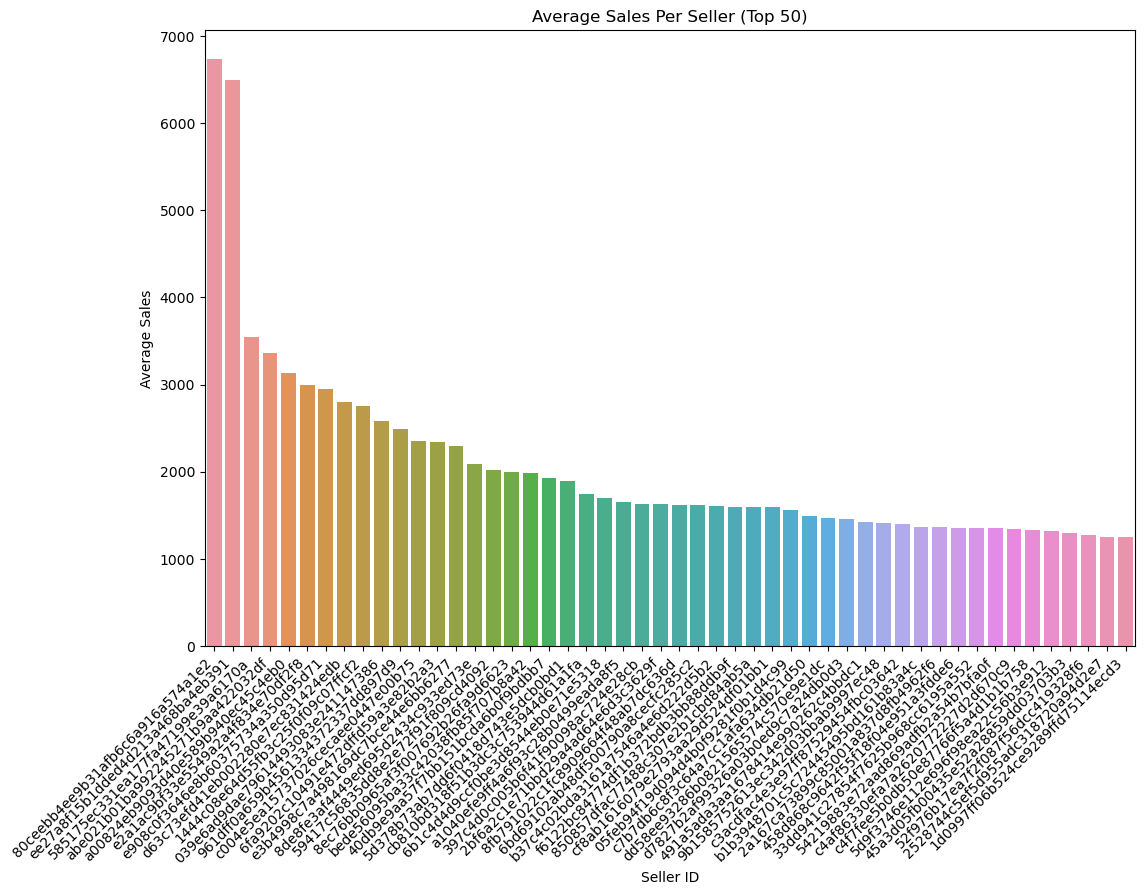

In [3]:
# 1. Calculate the average sales per seller.(Top 50)
cursor.execute("""
SELECT seller_id, AVG(price) as avg_sales 
FROM order_items 
GROUP BY seller_id 
ORDER BY avg_sales DESC 
LIMIT 50;
""")
result = cursor.fetchall()

# Convert the result to a DataFrame
top_sellers_avg_sales_df = pd.DataFrame(result, columns=['Seller ID', 'Average Sales'])

# Plot the average sales per seller for the top 50 sellers as a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_sellers_avg_sales_df, x='Seller ID', y='Average Sales')
plt.title('Average Sales Per Seller (Top 50)')
plt.xlabel('Seller ID')
plt.ylabel('Average Sales')
plt.xticks(rotation=45, ha='right')
plt.show()


Correlation between delivery time and number of orders: -0.52


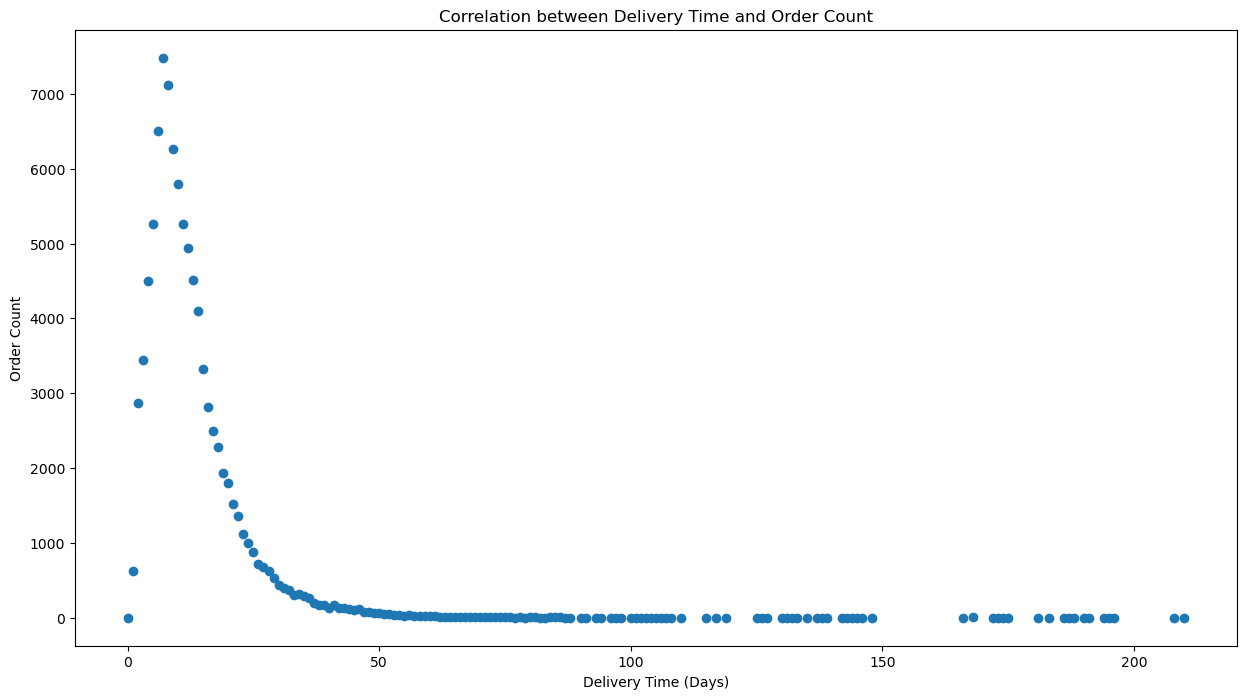

In [4]:
# 2. Find the correlation between the number of orders and the delivery time.
cursor.execute("""
SELECT 
    DATEDIFF(order_delivered_customer_date, order_purchase_timestamp) as delivery_time,
    COUNT(order_id) as order_count
FROM orders
WHERE order_delivered_customer_date IS NOT NULL
GROUP BY delivery_time;
""")
result = cursor.fetchall()

# Convert the result to a DataFrame
correlation_df = pd.DataFrame(result, columns=['Delivery Time', 'Order Count'])

# Calculate the correlation between delivery time and order count
correlation = correlation_df['Delivery Time'].corr(correlation_df['Order Count'])
print(f"Correlation between delivery time and number of orders: {correlation:.2f}")

# Plotting the relationship between delivery time and order count
plt.figure(figsize=(15, 8))
plt.scatter(correlation_df['Delivery Time'], correlation_df['Order Count'])
plt.title('Correlation between Delivery Time and Order Count')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Order Count')
plt.show()

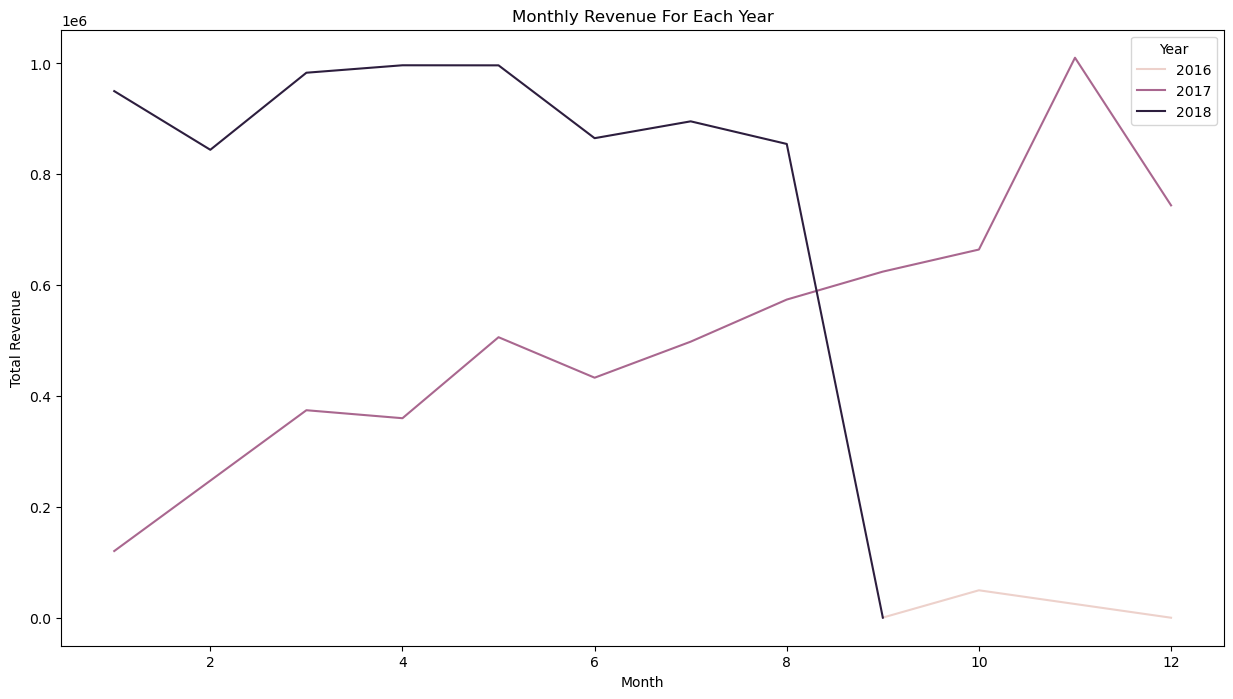

In [5]:
# 3. Calculate the monthly revenue for each year.
cursor.execute("""
SELECT YEAR(o.order_purchase_timestamp) as year, MONTH(o.order_purchase_timestamp) as month, 
       SUM(oi.price) as total_revenue 
FROM orders o 
JOIN order_items oi ON o.order_id = oi.order_id 
GROUP BY year, month;
""")
result = cursor.fetchall()

# Convert the result to a DataFrame
monthly_revenue_df = pd.DataFrame(result, columns=['Year', 'Month', 'Total Revenue'])

# Plot the monthly revenue for each year as a line plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=monthly_revenue_df, x='Month', y='Total Revenue', hue='Year')
plt.title('Monthly Revenue For Each Year')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

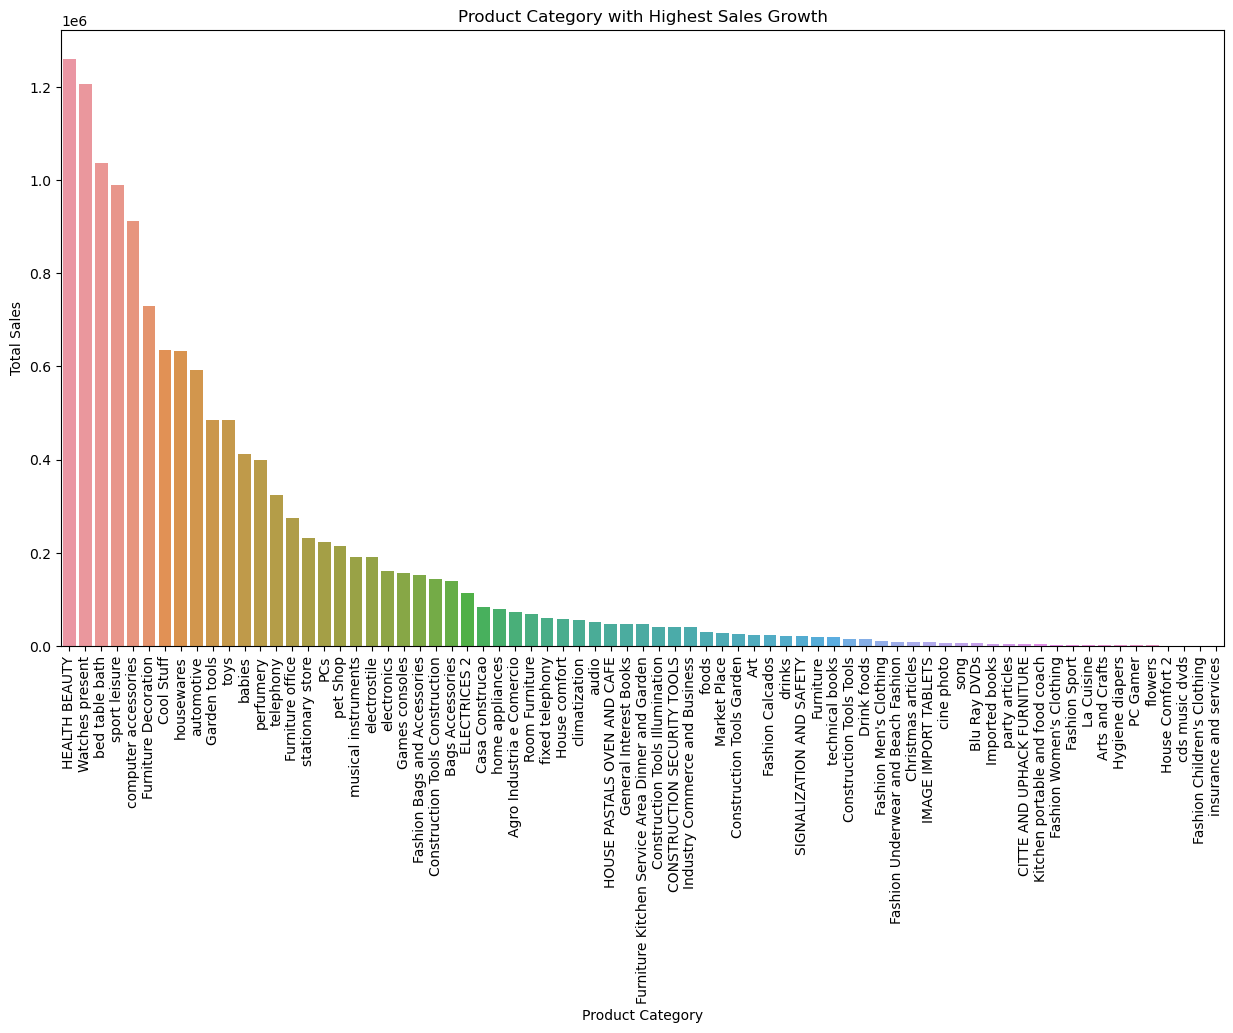

In [6]:
# 4. Identify the product category with the highest sales growth.
cursor.execute("""
SELECT p.product_category, SUM(oi.price) as total_sales 
FROM order_items oi 
JOIN products p ON oi.product_id = p.product_id 
GROUP BY p.product_category 
ORDER BY total_sales DESC;
""")
result = cursor.fetchall()

# Convert the result to a DataFrame
category_sales_df = pd.DataFrame(result, columns=['Product Category', 'Total Sales'])

# Plot the product category with the highest sales growth as a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(data=category_sales_df, x='Product Category', y='Total Sales')
plt.title('Product Category with Highest Sales Growth')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

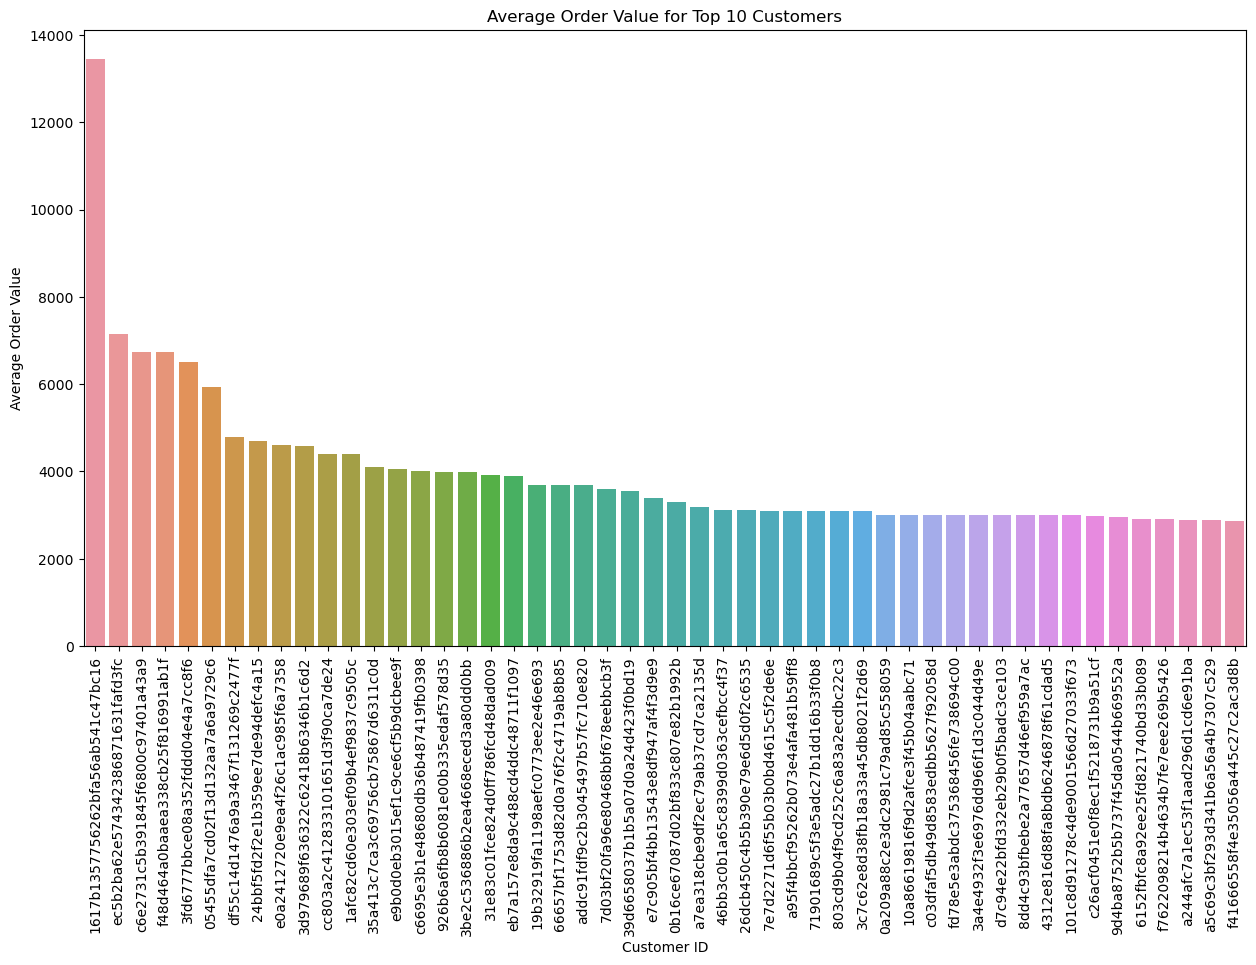

In [7]:
# 6. Determine the average order value per customer(Top 50).

cursor.execute("""
SELECT customer_id, AVG(total_order_value) as avg_order_value 
FROM (
    SELECT o.customer_id, SUM(oi.price) as total_order_value 
    FROM order_items oi 
    JOIN orders o ON oi.order_id = o.order_id 
    GROUP BY o.customer_id, oi.order_id
) as order_summary 
GROUP BY customer_id
ORDER BY avg_order_value DESC
LIMIT 50;
""")
result = cursor.fetchall()

# Convert the result to a DataFrame
top_customers_avg_order_value_df = pd.DataFrame(result, columns=['Customer ID', 'Average Order Value'])

# Plot the average order value for the top 10 customers as a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(data=top_customers_avg_order_value_df, x='Customer ID', y='Average Order Value')
plt.title('Average Order Value for Top 10 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)
plt.show()


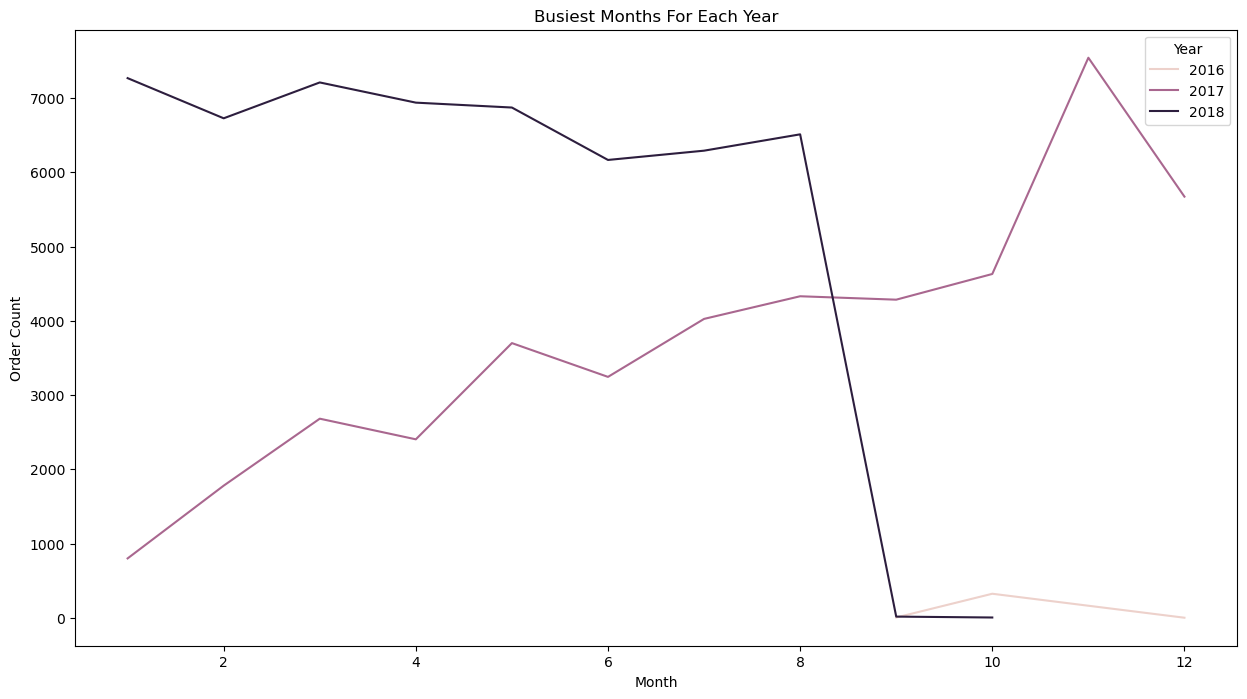

In [8]:
# 7. Identify the busiest months for each year.
cursor.execute("""
SELECT YEAR(o.order_purchase_timestamp) as year, MONTH(o.order_purchase_timestamp) as month, 
       COUNT(*) as order_count 
FROM orders o 
GROUP BY year, month 
ORDER BY order_count DESC;
""")
result = cursor.fetchall()

# Convert the result to a DataFrame
busiest_months_df = pd.DataFrame(result, columns=['Year', 'Month', 'Order Count'])

# Plot the busiest months for each year as a line plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=busiest_months_df, x='Month', y='Order Count', hue='Year')
plt.title('Busiest Months For Each Year')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.show()

In [9]:
# 8. Calculate the percentage of total revenue contributed by the top 10% of customers.
cursor.execute("""
SELECT customer_id, SUM(oi.price) as total_revenue 
FROM order_items oi 
JOIN orders o ON oi.order_id = o.order_id 
GROUP BY customer_id 
ORDER BY total_revenue DESC;
""")
result = cursor.fetchall()

# Convert the result to a DataFrame
revenue_df = pd.DataFrame(result, columns=['Customer ID', 'Total Revenue'])

# Calculate the revenue contribution from the top 10% of customers
top_10_percent_threshold = int(len(revenue_df) * 0.1)
top_10_percent_revenue = revenue_df['Total Revenue'].iloc[:top_10_percent_threshold].sum()
total_revenue = revenue_df['Total Revenue'].sum()
percentage_contribution = (top_10_percent_revenue / total_revenue) * 100
print(f"Percentage of total revenue contributed by the top 10% of customers: {percentage_contribution:.2f}%")

Percentage of total revenue contributed by the top 10% of customers: 41.10%


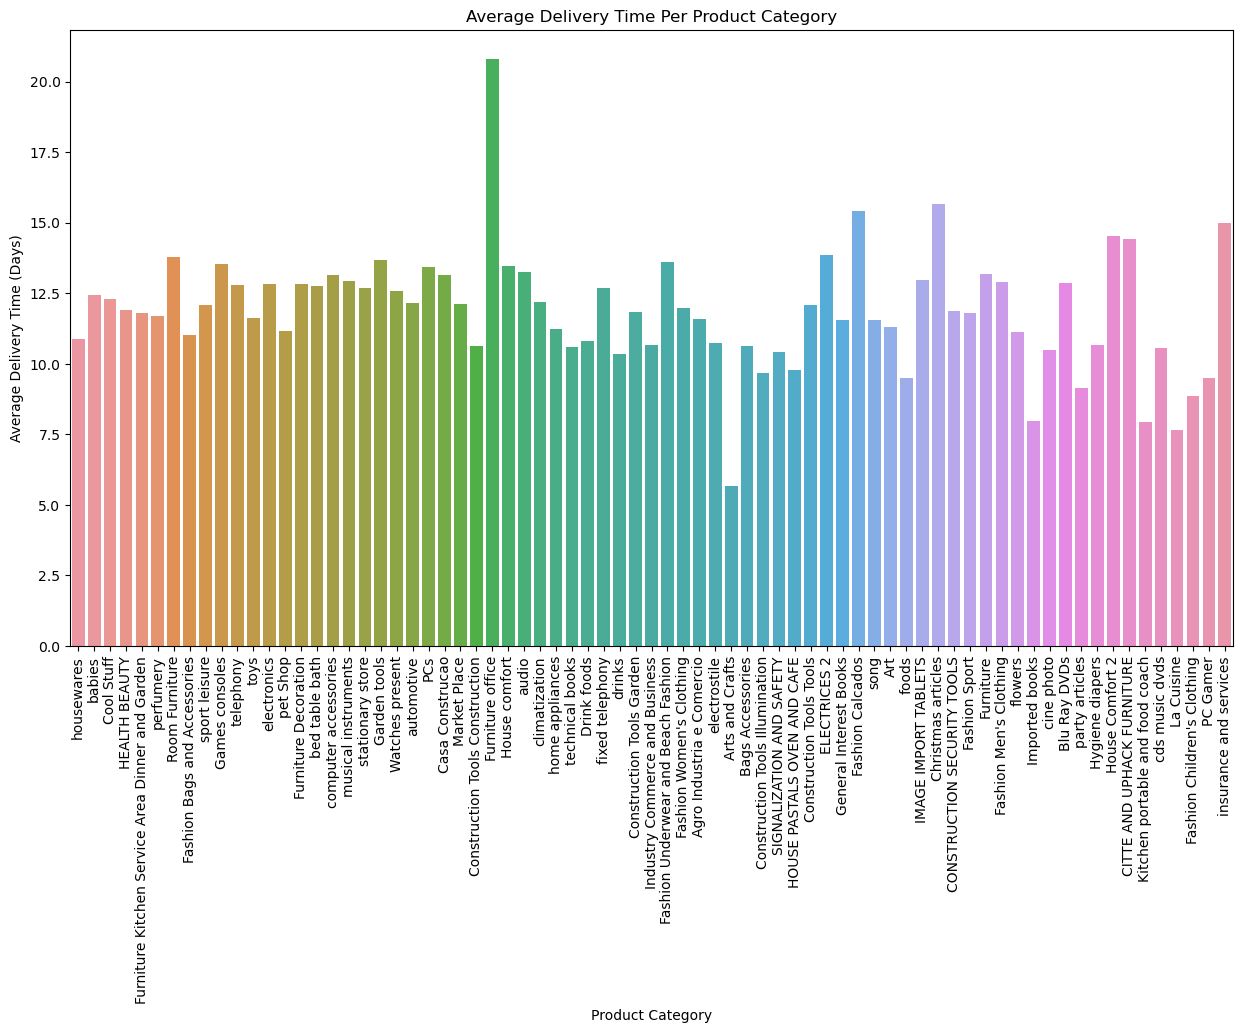

In [10]:
# 9. Find the average delivery time per product category.
cursor.execute("""
SELECT p.product_category, 
       AVG(DATEDIFF(o.order_delivered_customer_date, o.order_purchase_timestamp)) as avg_delivery_time 
FROM orders o 
JOIN order_items oi ON o.order_id = oi.order_id 
JOIN products p ON oi.product_id = p.product_id 
GROUP BY p.product_category;
""")
result = cursor.fetchall()

# Convert the result to a DataFrame
delivery_time_df = pd.DataFrame(result, columns=['Product Category', 'Average Delivery Time'])

# Plot the average delivery time per product category as a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(data=delivery_time_df, x='Product Category', y='Average Delivery Time')
plt.title('Average Delivery Time Per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Delivery Time (Days)')
plt.xticks(rotation=90)
plt.show()

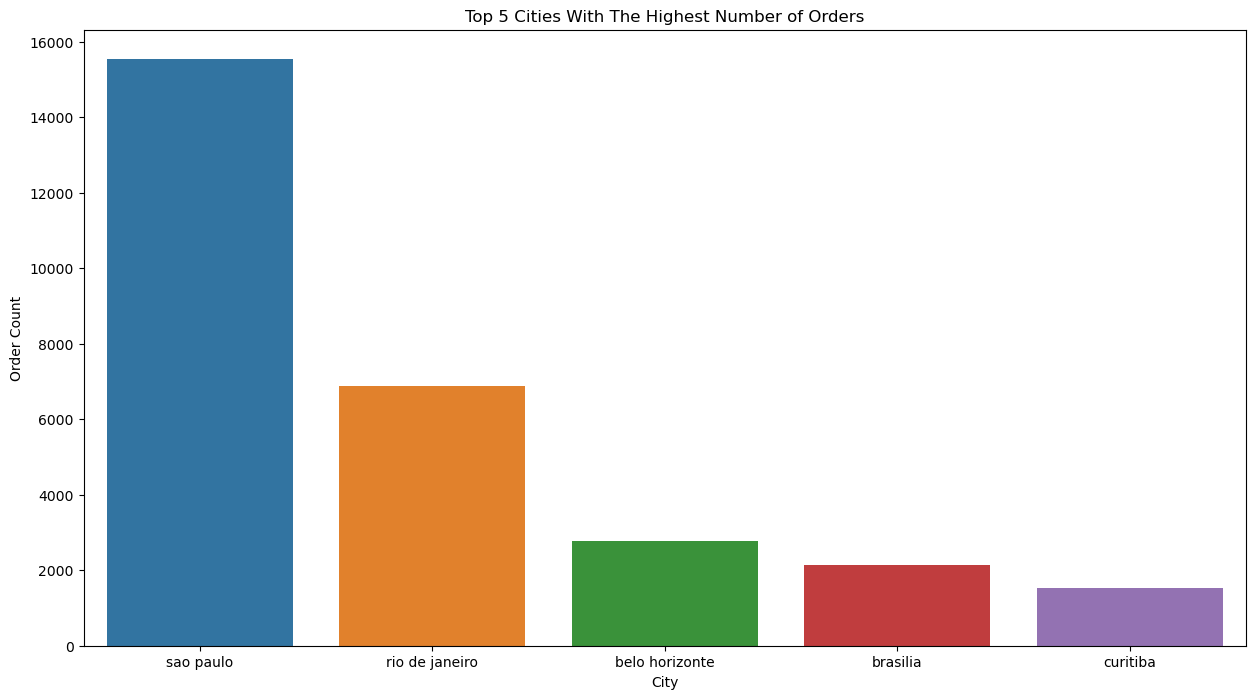

In [11]:
# 10. Identify the top 5 cities with the highest number of orders.
cursor.execute("""
SELECT c.customer_city, COUNT(*) as order_count 
FROM orders o 
JOIN customers c ON o.customer_id = c.customer_id 
GROUP BY c.customer_city 
ORDER BY order_count DESC 
LIMIT 5;
""")
result = cursor.fetchall()

# Convert the result to a DataFrame
top_cities_df = pd.DataFrame(result, columns=['City', 'Order Count'])

# Plot the top 5 cities with the highest number of orders as a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(data=top_cities_df, x='City', y='Order Count')
plt.title('Top 5 Cities With The Highest Number of Orders')
plt.xlabel('City')
plt.ylabel('Order Count')
plt.show()

In [12]:
# 11. Calculate the percentage of orders with free shipping.
cursor.execute("""
SELECT COUNT(*) as total_orders, 
       SUM(CASE WHEN freight_value = 0 THEN 1 ELSE 0 END) as free_shipping_orders 
FROM order_items;
""")
result = cursor.fetchone()

# Calculate the percentage of orders with free shipping
percentage_free_shipping = (result[1] / result[0]) * 100
print(f"Percentage of orders with free shipping: {percentage_free_shipping:.2f}%")

Percentage of orders with free shipping: 0.34%


In [13]:
# 12. Determine the number of orders where the product price was discounted.
cursor.execute("""
SELECT COUNT(*) 
FROM order_items 
WHERE price < (SELECT AVG(price) FROM order_items);
""")
result = cursor.fetchone()
print(f"Number of orders with discounted product prices: {result[0]}")

Number of orders with discounted product prices: 80522


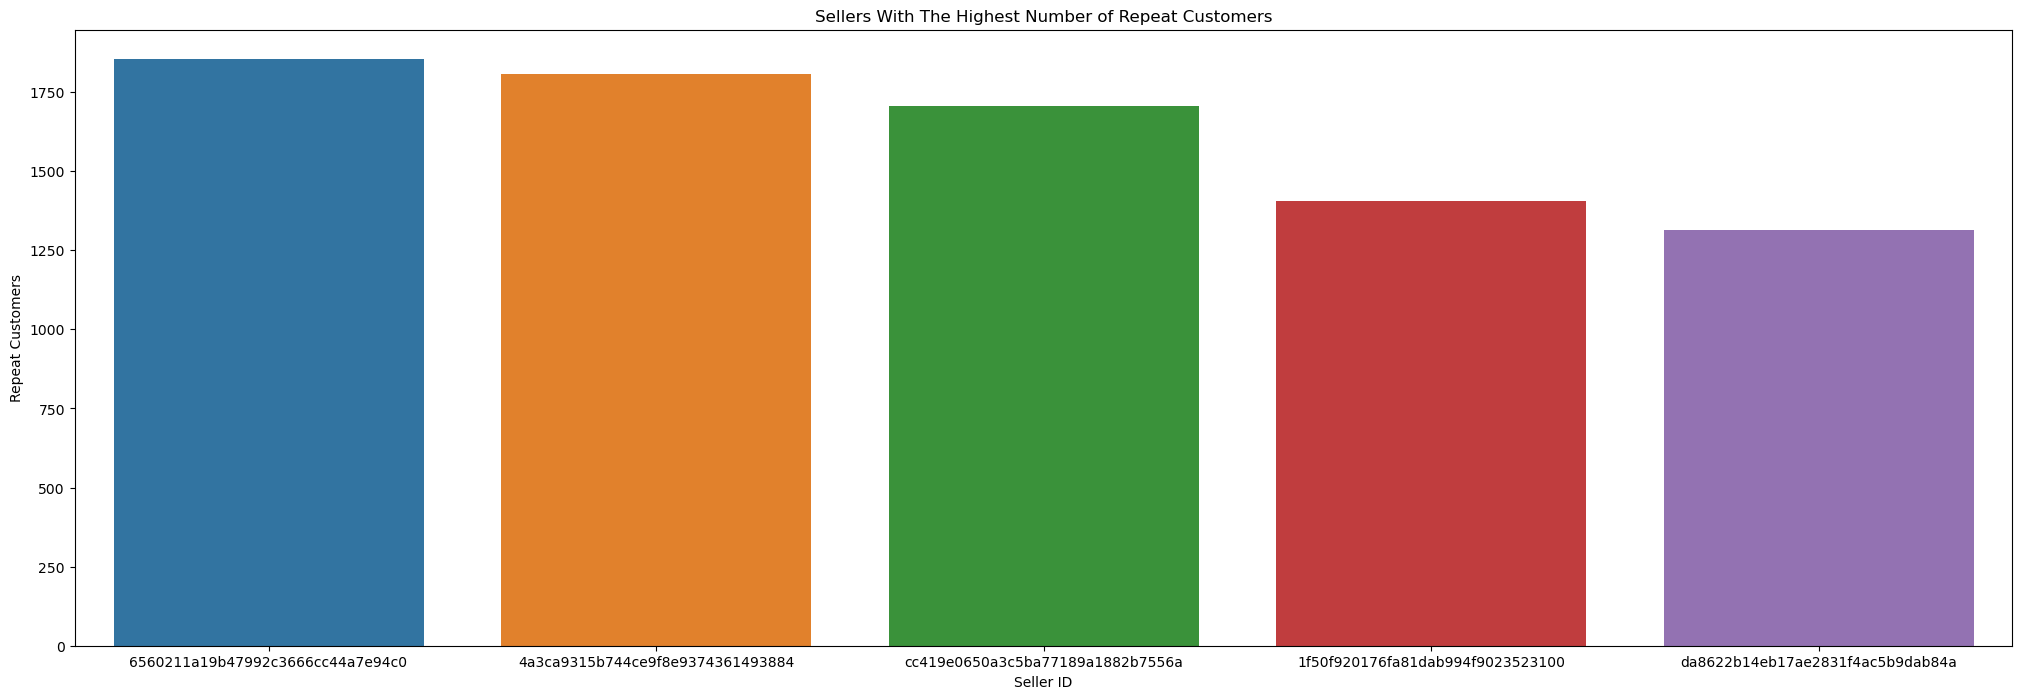

In [14]:
# 13. Identify the sellers with the highest number of repeat customers.
cursor.execute("""
SELECT oi.seller_id, COUNT(DISTINCT o.customer_id) as repeat_customers 
FROM orders o 
JOIN order_items oi ON o.order_id = oi.order_id 
GROUP BY oi.seller_id 
ORDER BY repeat_customers DESC 
LIMIT 5;
""")
result = cursor.fetchall()

# Convert the result to a DataFrame
repeat_sellers_df = pd.DataFrame(result, columns=['Seller ID', 'Repeat Customers'])

# Plot the sellers with the highest number of repeat customers as a bar plot
plt.figure(figsize=(25, 8))
sns.barplot(data=repeat_sellers_df, x='Seller ID', y='Repeat Customers')
plt.title('Sellers With The Highest Number of Repeat Customers')
plt.xlabel('Seller ID')
plt.ylabel('Repeat Customers')
plt.show()

In [15]:
# 14. Calculate the average time between order placement and delivery.
cursor.execute("""
SELECT AVG(DATEDIFF(order_delivered_customer_date, order_purchase_timestamp)) as avg_delivery_time 
FROM orders;
""")
result = cursor.fetchone()
print(f"Average time between order placement and delivery: {result[0]:.2f} days")

Average time between order placement and delivery: 12.50 days


In [16]:
# 15. Identify the payment type with the highest average transaction value.
cursor.execute("""
SELECT payment_type, AVG(payment_value) as avg_transaction_value 
FROM payments 
GROUP BY payment_type 
ORDER BY avg_transaction_value DESC 
LIMIT 1;
""")
result = cursor.fetchone()
print(f"Payment type with the highest average transaction value: {result[0]}, Average Value: ${result[1]:,.2f}")

Payment type with the highest average transaction value: credit_card, Average Value: $163.32


In [17]:
# Close connection
cursor.close()
connection.close()